# Soal 5
## Athletes.csv
### Header

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import scipy
import datetime
from scipy.stats import gamma
import matplotlib.pyplot as plt

### Membaca data

In [2]:
athlete = pd.read_csv('athletes.csv')
athlete

Name  Medal
0                                             A Dijiang      0
1                                              A Lamusi      0
2                              A. Aanantha Sambu Mayavo      0
3                                       A. Abdul Razzak      0
4                                               A. Brun      0
5                                            A. Buydens      0
6                                        A. Charles Six      0
7                                          A. Christory      0
8                                             A. Darnis      0
9                                         A. Duponcheel      0
10                                           A. E. Page      0
11                                        A. G. Chagale      0
12                       A. Germaine Golding (Regnier-)      0
13                                           A. Godinat      0
14                                    A. Hurtado Vargas      0
15                                     A. Hussain Ahmed      0
16                                       A. J. J. Fridt      0
17              A. J. Tyronne Benildus "Benny" Fernando      0
18                                          A. Kordonis      0
19                                            A. Laffen      0
20                                        A. Lafontaine      0
21                                    A. Lambrecht, Jr.      0
22                                         A. O. Pinner      0
23                                         A. Papadakis      0
24                                           A. Porcher      0
25                                           A. Priftis      0
26                                             A. Roger      0
27                                         A. S. Harley      0
28                                    A. Sattar Basheer      0
29                                           A. Schmitt      0
...                                                 ...    ...
134701                            Isabelle Regina Werth     10
134702                                     Marit Bjrgen     10
134703                      Polina Hryhorivna Astakhova     10
134704                         Raisa Petrovna Smetanina     10
134705                      Raymond Clarence "Ray" Ewry     10
134706                                Stefania Belmondo     10
134707                    Vitaly Venediktovich Shcherbo     10
134708                                        Yang Yang     10
134709                        gnes Keleti-Srkny (Klein)     10
134710                    Aleksandr Vladimirovich Popov     11
134711                             Carl Townsend Osburn     11
134712                                Mark Andrew Spitz     11
134713                   Matthew Nicholas "Matt" Biondi     11
134714                        Viktor Ivanovych Chukarin     11
134715                           Vra slavsk (-Odloilov)     11
134716                          Aleksey Yuryevich Nemov     12
134717                           Birgit Fischer-Schmidt     12
134718             Dara Grace Torres (-Hoffman, -Minas)     12
134719  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     12
134720                    Natalie Anne Coughlin (-Hall)     12
134721                             Paavo Johannes Nurmi     12
134722                               Ryan Steven Lochte     12
134723                                       Sawao Kato     12
134724                      Borys Anfiyanovych Shakhlin     13
134725                              Edoardo Mangiarotti     13
134726                              Ole Einar Bjrndalen     13
134727                                      Takashi Ono     13
134728                     Nikolay Yefimovich Andrianov     15
134729               Larysa Semenivna Latynina (Diriy-)     18
134730                          Michael Fred Phelps, II     28

[134731 rows x 2 columns]

### Deskripsi data
#### Deskripsi data numerik

In [3]:
athlete.describe()

Medal
count  134731.000000
mean        0.295277
std         0.724716
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        28.000000

### Deskripsi data secara lengkap

In [4]:
def mode(x):
    return x.value_counts().index[0]
athlete.agg({'Medal' :['min', 'max', 'mean', mode, 'median', 'var', 'std', 'skew', 'kurt']})

Medal
min      0.000000
max     28.000000
mean     0.295277
mode     0.000000
median   0.000000
var      0.525213
std      0.724716
skew     4.819999
kurt    51.562526

### Deskripsi data secara boxplot

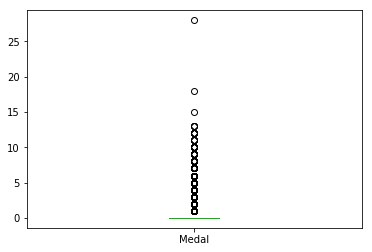

In [5]:
Medals = athlete['Medal']
Medals.plot(kind = 'box')

### Deskripsi data secara histogram

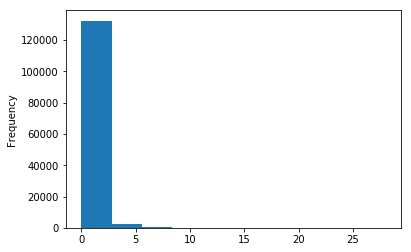

In [6]:
Medals.plot(kind = 'hist')

### Deskripsi data secara kontinu

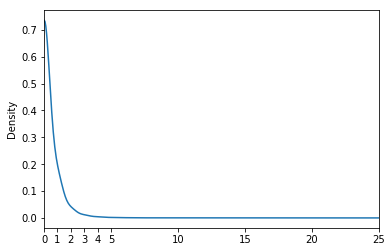

In [7]:
Medals.plot.kde(xlim = [0,25], bw_method=0.6, xticks=[0,1,2,3,4,5,10,15,20,25])

### Fungsi distribusi peluang
#### Fungsi distribusi peluang yang awalnya ingin digunakan adalah distribusi Gamma. Distribusi ini ingin dipilih karena bentuk yang mirip dengan bentuk pada distribusi gamma
#### Namun, data sebenarnya bersifat diskrit. Maka dari itu, digunakan distribusi binomial karena evaluasi data yang mungkin hanya menghasilkan nilai ya atau tidak
#### Kesimpulan : Binomial

#### Pendekatan dengan distribusi gamma (jika misalnya data kontinu)

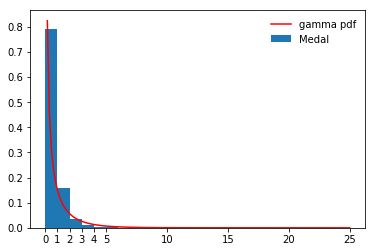

-3.386551541794366e-31


In [9]:
alp, locx, bt = gamma.fit(Medals)
fig, ax = plt.subplots(1, 1)
a = 12
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
x = np.linspace(locx, 25, 150)
beta = Medals.var() / Medals.mean()
alpha = Medals.mean() / beta
ax.plot(x, gamma.pdf(x, alp, locx, bt), 'r-', label='gamma pdf')
rv = gamma(a)
#ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.hist(Medals, density='True', bins=range(25))
#plt.ylim([0,1])
ax.legend(loc='best', frameon=False)
plt.xticks([0,1,2,3,4,5,10,15,20,25])
plt.show()
print(locx)

### Jawaban pertanyaan 5-a-i
#### Peluang jumlah didapat 0 medali jika diambil 1 data
#### Mencari jumlah 0 medali, lalu bagi dengan total data.

In [10]:
count_row = athlete.shape[0]
Zero = Medals[Medals == 0].count()
probability = (Zero / count_row)
probability

0.7906792052311643

### Jawaban pertanyaan 5-a-ii
#### Peluang jumlah didapat lebih dari 10 medali jika diambil 1 data
#### Mencari jumlah lebih dari 10 medali, lalu bagi dengan total data.

In [11]:
Ten = Medals[Medals > 10].count()
probability = (Ten / count_row)
probability

0.00015586613325812174

### Jawaban pertanyaan 5-a-iii
#### Peluang jumlah didapat 3 medali jika diambil 1 data
#### Mencari jumlah 3 medali, lalu bagi dengan total data.

In [12]:
Three = Medals[Medals == 3].count()
probability = (Three / count_row)
probability

0.01027974259821422

### Jawaban pertanyaan 5-a-iv
#### Peluang jumlah didapat 1 atau 5 medali jika diambil 1 data
#### Mencari jumlah 1 atau medali, lalu bagi dengan total data.

In [13]:
OneorFive = Medals[(Medals == 1) | (Medals == 5)].count()
probability = (OneorFive / count_row)
probability

0.1588424341836697

### Jawaban pertanyaan 5-b
#### Confidence interval 95%
#### Jika diambil n=1 maka: x-bar=mu=0.2953, std=0.7247, z=1.96
#### maka interval = 0.2953-1.96*0.7247<mu<0.2953+1.96*0.7247
#### = -1.125112 < mu < 1.715712
#### karena medali tidak mungkin bernilai negatif maka:
#### 0 < mu < 1.715712
#### JIka diambil n=134731:
#### interval = 0.2953-1.96*(0.7247/1354731^(1/2))<mu<0.2953-1.96*(0.7247/1354731^(1/2))
#### = 0.29407964046<mu<0.29652035953



In [15]:
alpha = 0.05
xbar = Medals.mean()
std = Medals.std()
# Z didapat dari tabel
z = 1.96 
bot = xbar - z * std
up = xbar + z * std
print(bot, " -- mean -- ", up)

-1.1251660999767084  -- mean --  1.7157206123012663
